In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

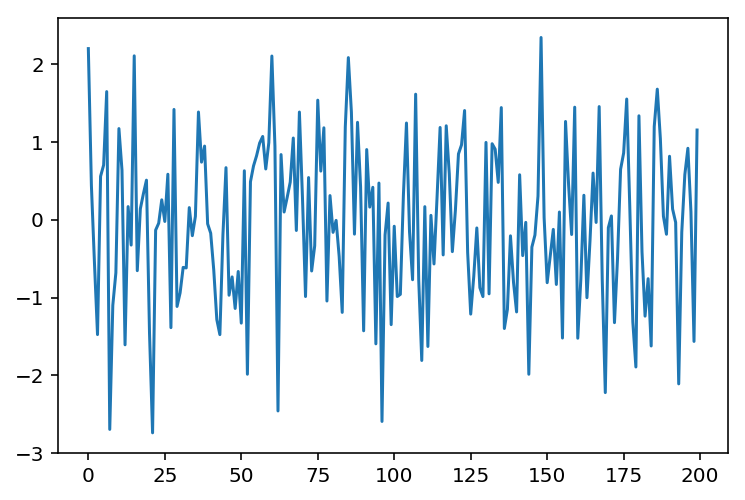

In [3]:
# let's create a random timeseries of gaussian random values
timeseries = np.random.randn(10000)
plt.plot(timeseries[:200])

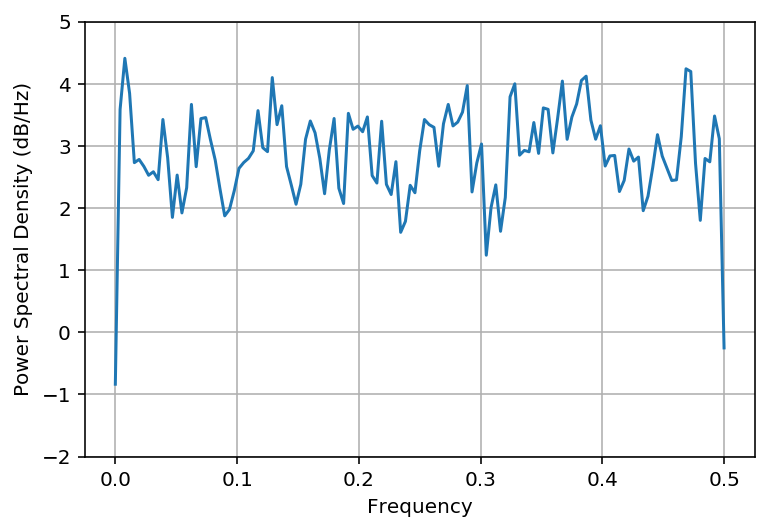

In [4]:
# let's look at the power spectrum of timeseries
plt.psd(timeseries, Fs=1.0);

In [5]:
# let's design a filter that cuts off frequencies above 0.3
numtaps = 101
lowpass_p3 = signal.firwin(numtaps, 0.3, fs=1.0)

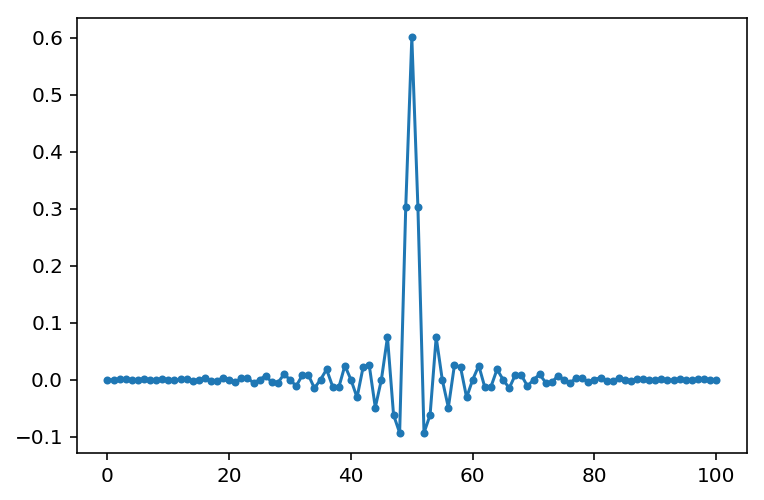

In [6]:
# let's look at the filter, by plotting it!
plt.plot(lowpass_p3, '.-');

In [7]:
# let's filter our timeseries with our new filter
lowpass_timeseries = np.convolve(timeseries, lowpass_p3, 'same')

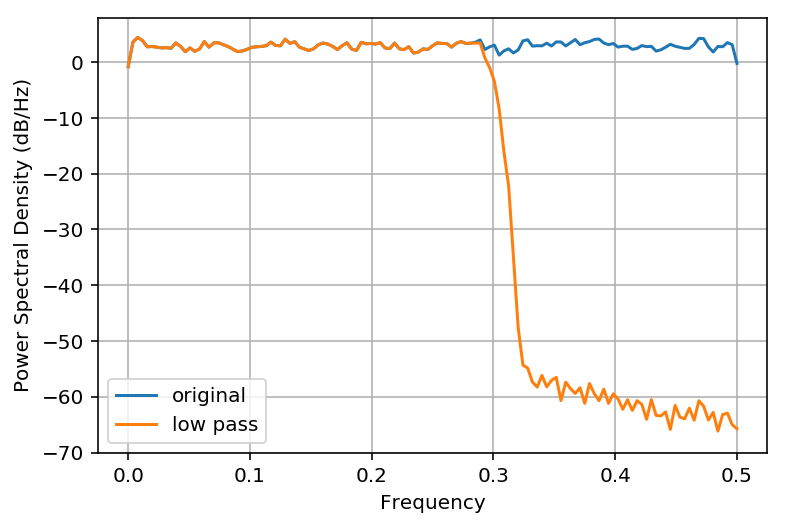

In [9]:
# let's look at the power spectrum of the result
plt.psd(timeseries, Fs=1.0, label='original');
plt.psd(lowpass_timeseries, Fs=1.0, label='low pass');
plt.legend()

In [12]:
f, lowpass_p3_freqz = signal.freqz(lowpass_p3, fs=1.0)

In [15]:
len(f), len(lowpass_p3_freqz)

(512, 512)

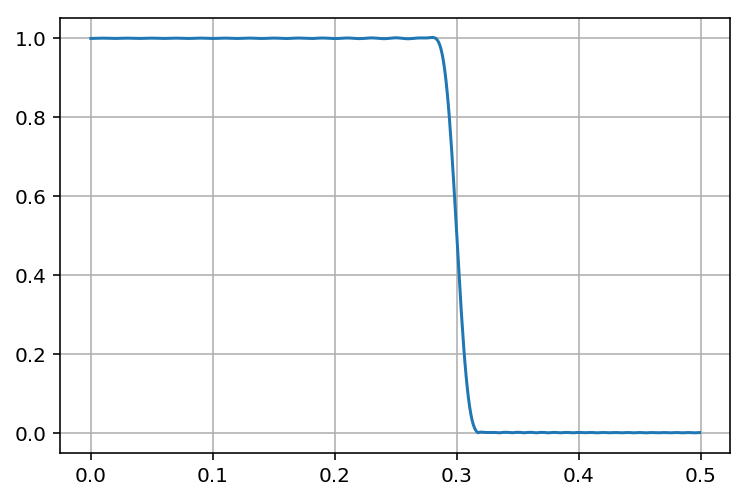

In [19]:
plt.plot(f, np.abs(lowpass_p3_freqz))
plt.grid()

In [20]:
np.set_printoptions? # controls how numpy prints numbers!

Text(0,0.5,'Filter Frequency Response')

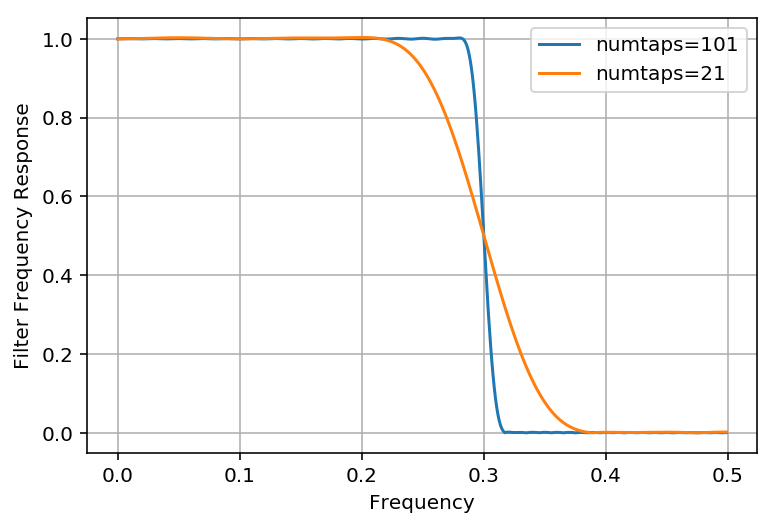

In [21]:
lowpass_2 = signal.firwin(21, 0.3, fs=1.0)

f2, lowpass_2_freqz = signal.freqz(lowpass_2, fs=1.0)

plt.plot(f, np.abs(lowpass_p3_freqz), label='numtaps=101')
plt.plot(f2, np.abs(lowpass_2_freqz), label='numtaps=21')
plt.grid()
plt.legend()
plt.xlabel("Frequency")
plt.ylabel("Filter Frequency Response")

(0.95, 1.05)

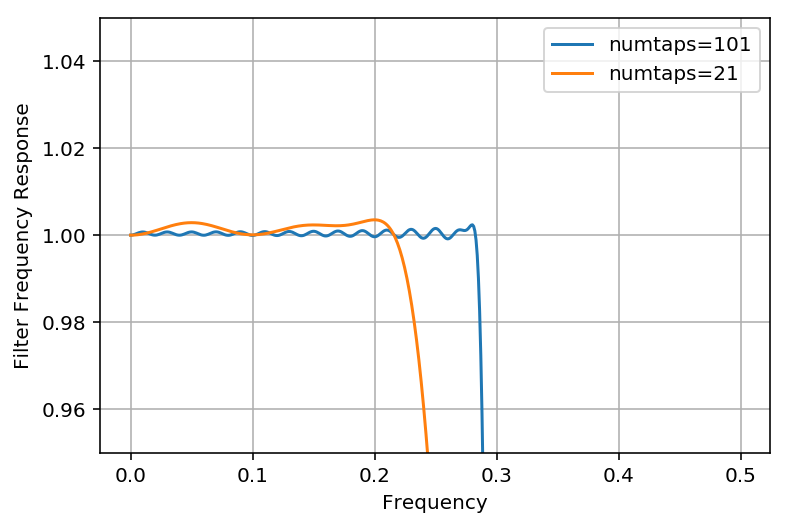

In [25]:
plt.plot(f, np.abs(lowpass_p3_freqz), label='numtaps=101')
plt.plot(f2, np.abs(lowpass_2_freqz), label='numtaps=21')
plt.grid()
plt.legend()
plt.xlabel("Frequency")
plt.ylabel("Filter Frequency Response")

plt.ylim(0.95, 1.05)

(0, 200)

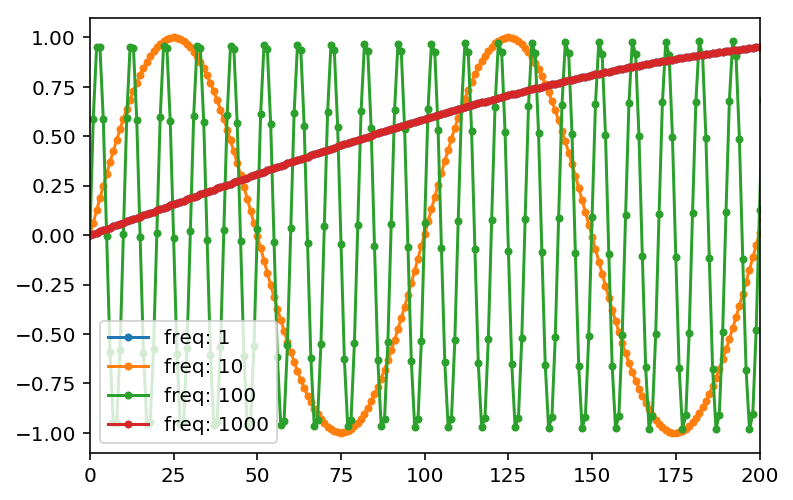

In [35]:
t = np.linspace(0, 2*np.pi, 1000)
#ts1 = np.sin(t)
#ts2 = np.sin(1000*t)
freqs = [1, 10, 100, 1000]
tsn = [np.sin(freq * t) for freq in freqs]

for ts,f in zip(tsn, freqs):
    plt.plot(ts, '.-', label='freq: %d'%f)

plt.legend()
plt.xlim(0, 200)

(0, 2)

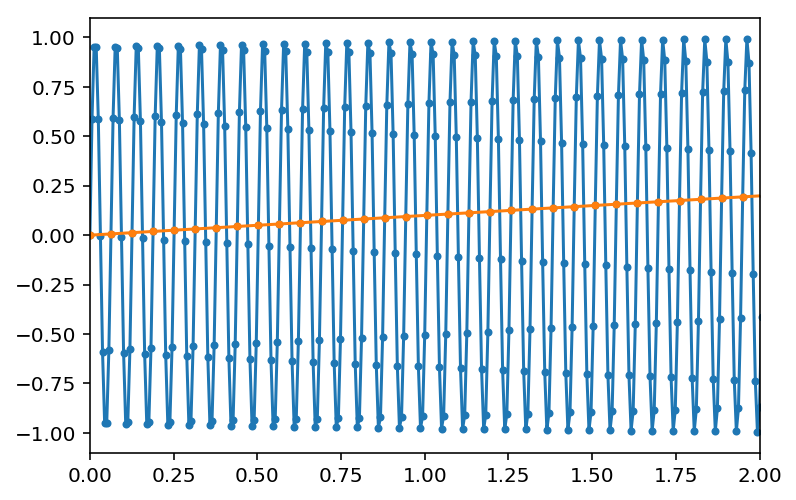

In [44]:
plt.plot(t, tsn[2], '.-')
plt.plot(t[::10], tsn[2][::10], '.-')
plt.xlim(0, 2)